In [1]:
%load_ext autoreload
%autoreload 2

from math import pi
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

from root_pandas import read_root

Welcome to JupyROOT 6.10/04


In [2]:
import ROOT

In [3]:
from matplotlib.colors import LogNorm

In [4]:
plt.rcParams.update({'font.size': 18})

In [5]:
#df = read_root('chi2_mucs_sim_0119.root', key="fmatch/flashes")
df = read_root('triggervalidation_ana.root', key="triggervalidation/wf_tree")
print (df.shape)

(181, 5)


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
print df.keys()

Index([u'_run', u'_sub', u'_evt', u'_ch', u'_adc_v'], dtype='object')


PLOTTING EVENT 853


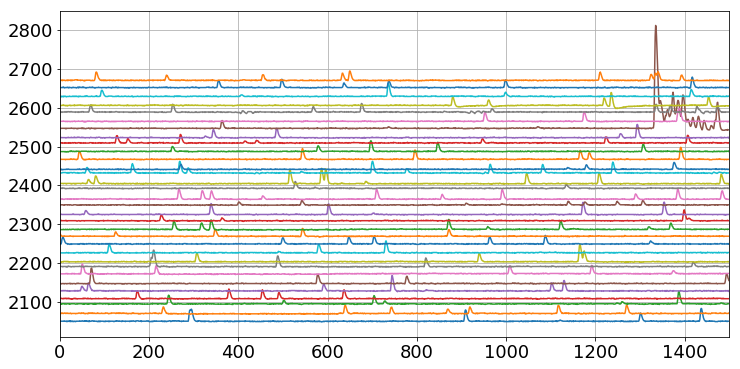

PLOTTING EVENT 873


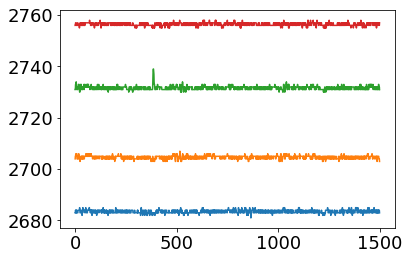

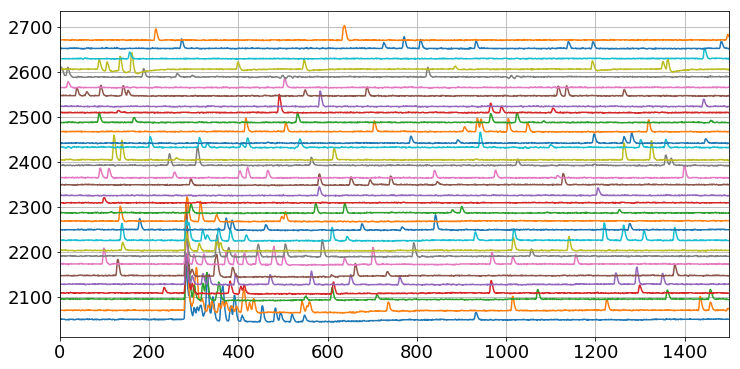

PLOTTING EVENT 877


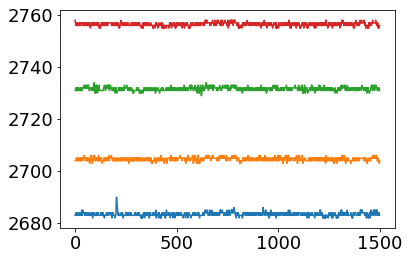

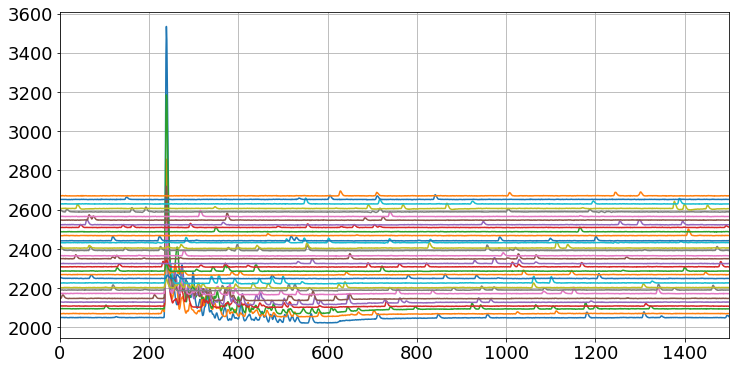

PLOTTING EVENT 884


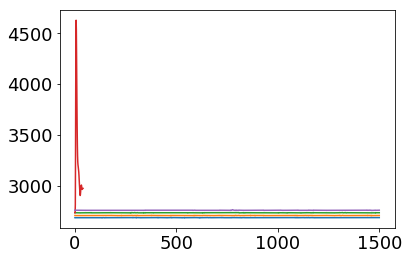

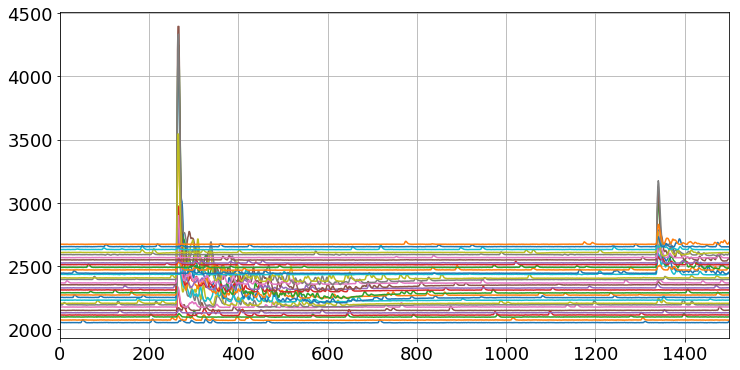

PLOTTING EVENT 893


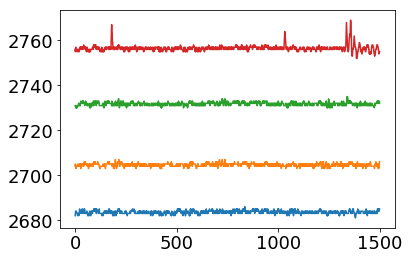

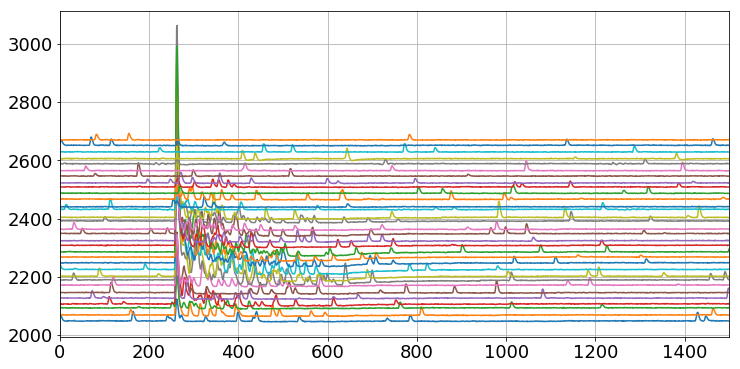

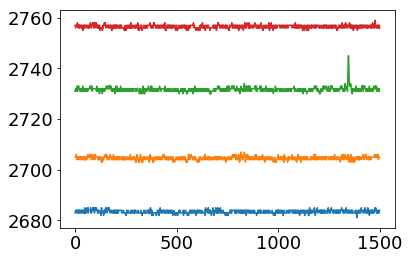

In [14]:

#plt.title('PMT channel %02i'%ch)
maxch = -1
maxadc = 0
maxtick = 0

minch = -1
minadc = 4095
mintick = 0

OFFSET = 20.

for i,row in df.iterrows():
    adc_v = row['_adc_v']
    adc_v_shift = []
    ch = row['_ch']
    event = row['_evt']
    if (ch==0):
        fig = plt.figure(figsize=(12,6))
        print 'PLOTTING EVENT %i'%event
    for n,adc in enumerate(adc_v):
        if (n > 800):
            if (adc > maxadc):
                maxadc = adc
                maxch = ch
                maxtick = n
        if (n > 700):
            if (adc < minadc):
                minadc = adc
                minch = ch
                mintick = n
                
        adc_v_shift.append(adc)
    ch = row['_ch']
    plt.plot(row['_adc_v']+OFFSET*ch)
    if (ch == 31):
                
        plt.xlim([0,1500])
        plt.grid()
        plt.show()
        

